In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [53]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


In [54]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

In [55]:
data_test = pd.read_csv("./data/genresTest.csv")
data_test.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5851,887.72,203130.0,-0.17260,-0.16509,-0.15114,-0.14272,-0.13747,-0.13437,-0.12990,...,0.014458,0.003283,0.060789,0.000173,0.049469,0.000209,0.014727,0.000058,0.003690,0.000007
1,2.4621,370.86,4835.0,-0.16553,-0.16676,-0.16022,-0.15304,-0.14354,-0.13443,-0.12450,...,0.007165,0.001832,0.019472,0.000006,0.021197,0.000100,0.008136,0.000055,0.002112,0.000006
2,2.5894,536.33,59175.0,-0.14433,-0.15838,-0.15151,-0.13966,-0.12591,-0.11795,-0.11744,...,0.009742,0.002032,0.037165,0.000158,0.037856,0.000123,0.009627,0.000068,0.001916,0.000004
3,2.4876,1053.70,147250.0,-0.12813,-0.11979,-0.12223,-0.11881,-0.12020,-0.12702,-0.13608,...,0.020571,0.002458,0.074786,0.000113,0.088109,0.000152,0.021083,0.000071,0.002590,0.000006
4,2.7968,354.90,7610.9,-0.16335,-0.16976,-0.17196,-0.16772,-0.16637,-0.15903,-0.13995,...,0.004825,0.001905,0.017377,0.000015,0.010852,0.000153,0.004702,0.000044,0.002101,0.000008


In [56]:
m_cor = data_train.corr()

dict_l = {}
for i in m_cor.index:
    dict_l.update({i:m_cor[m_cor[i]>0.9].index})
    
cols_drop = []
for idx in dict_l:
    for j in range(len(dict_l[idx])):
        if idx != dict_l[idx][j]: #si tiene mas de un valor, el mismo no cuenta
            cols_drop.append(dict_l[idx][j])
            #print(idx, dict_l[idx][j])

In [57]:
df_train_drop = data_train
df_test_drop = data_test
for idx in np.unique(cols_drop):
    df_train_drop = df_train_drop.drop(idx,axis=1)
    df_test_drop = df_test_drop.drop(idx,axis=1)

In [58]:
for i in df_train_drop.columns:
    if sum(df_train_drop[i] > 100) > (df_train_drop.shape[0]/2):
        print(i)
        df_train_drop = df_train_drop.drop(i, axis=1)
        df_test_drop = df_test_drop.drop(i, axis=1)

PAR_SC_V


In [59]:
col_scalar = ["PAR_TC", "PAR_ASC", "PAR_ASS", "PAR_PEAK_RMS_TOT", "PAR_PEAK_RMS10FR_MEAN"]
col_outliers = ["PAR_ASC_V", "PAR_PEAK_RMS10FR_VAR"]

In [60]:
def column_scale(df, l_cols):
    """
    df: DataFrame de entrada
    l_cols: lista de columnas a escalar
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    for col in l_cols:
        #se cambia cada columna
        df[col] = (df[col] - np.mean(df[col]))/(max(df[col]) - min(df[col]))
        #df[col] = (df[col] - min(df[col]))/((max(df[col]) - min(df[col])))
    return df

In [61]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

X_trdrop = column_scale(X_trdrop, col_scalar)
X_testdrop = df_test_drop
X_testdrop = column_scale(X_testdrop, col_scalar)

X_trdrop = X_trdrop.drop(col_outliers, axis=1)

X_testdrop = X_testdrop.drop(col_outliers, axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_71.csv')

In [62]:
print("clase 1: ",np.mean(y_trdrop==1)*100)
print("clase 2: ",np.mean(y_trdrop==2)*100)
print("clase 3: ",np.mean(y_trdrop==3)*100)
print("clase 4: ",np.mean(y_trdrop==4)*100)
print("clase 5: ",np.mean(y_trdrop==5)*100)
print("clase 6: ",np.mean(y_trdrop==6)*100)

clase 1:  12.773109243697478
clase 2:  27.563025210084035
clase 3:  24.03361344537815
clase 4:  7.394957983193278
clase 5:  12.605042016806722
clase 6:  15.630252100840336


In [12]:
def generation_data(X, N, k):
    """
    Retorna nuevos datos generados a partir de los pasados en X.

    Parameters
    ----------
    X : dataframe con los datos minoritarios.
    N : (0-1] porcentaje de nuevos datos a generar.
    k : int. número de vecinos a utilizar.

    Returns
    -------
    S : array, shape = [N * n_minority_samples, n_features]
    """    
    n_minority_samples, n_features = X.shape

    if (N<=0 or N>1): raise ValueError("N debe estar entre (0,1]")

    n_synthetic_samples = int(N * n_minority_samples)
    S = np.zeros(shape=(n_synthetic_samples, n_features))
    aux = np.zeros(shape=X.shape)
    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(X)

    #Calculate synthetic samples
    for i in range(n_minority_samples):
        nn = neigh.kneighbors(np.array(X.iloc[i]).reshape(1,-1), return_distance=False)
        for n in np.arange(N):
            nn_index = np.random.choice(nn[0])
            #NOTE: nn includes T[i], we don't want to select it 
            while nn_index == i:
                nn_index = np.random.choice(nn[0])

            dif = X.iloc[nn_index] - X.iloc[i]
            gap = np.random.random()
            aux[i] = X.iloc[i,:] + gap * dif[:]
    S = aux[np.random.choice(np.arange(aux.shape[0]),S.shape[0],replace=False),:]
    return S

In [13]:
#5,1,4
clase = 4
X_aux = generation_data(X_trdrop.loc[data_train["GENRE"]==clase], 1, 60)
X_aux = pd.DataFrame(X_aux, columns=X_trdrop.columns)
X_new = pd.concat([X_trdrop, X_aux])
y_new = np.concatenate((y_trdrop,np.ones(X_aux.shape[0])*clase))
y_new = y_new.astype(int)

In [14]:
print("clase 1: ",np.mean(y_new==1)*100)
print("clase 2: ",np.mean(y_new==2)*100)
print("clase 3: ",np.mean(y_new==3)*100)
print("clase 4: ",np.mean(y_new==4)*100)
print("clase 5: ",np.mean(y_new==5)*100)
print("clase 6: ",np.mean(y_new==6)*100)

clase 1:  11.89358372456964
clase 2:  25.665101721439747
clase 3:  22.37871674491393
clase 4:  13.77151799687011
clase 5:  11.737089201877934
clase 6:  14.553990610328638


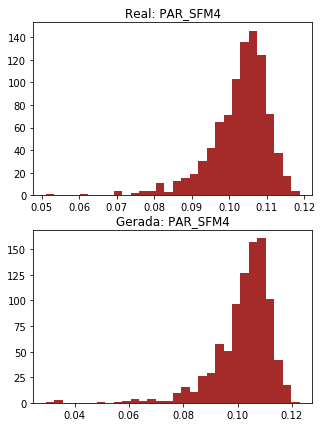

In [75]:
row = np.random.randint(0, X_trdrop.shape[1])
plt.figure(figsize=(5,7))
plt.subplot(2,1,1)
plt.title("Real: " + X_trdrop.iloc[:,row].name)
plt.hist(X_aux.iloc[:,row],30, color="brown")
plt.subplot(2,1,2)
plt.title("Gerada: " + X_trdrop.iloc[:,row].name)
plt.hist(X_trdrop.loc[data_train["GENRE"]==4].iloc[:,row],30,color="brown");

In [39]:
X_new.shape, y_new.shape

((13419, 114), (13419,))

In [40]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_new, y_new)

score = cross_val_score(eclf1, X_trdrop, y_trdrop, cv=10, n_jobs=2)


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

In [41]:
score

array([0.93535515, 0.92817239, 0.93136472, 0.92326139, 0.93114492,
       0.93830128, 0.94226143, 0.92943063, 0.9414595 , 0.9446672 ])

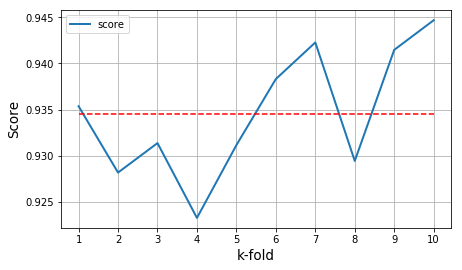

In [50]:
plt.figure(figsize=(7,4))
plt.grid()
plt.ylabel("Score", fontsize=13.5)
plt.xlabel("k-fold", fontsize=13.5)
plt.xticks(range(1,11),range(1,11))
plt.plot(range(1,11), score, label="score",linewidth=2)
plt.plot(range(1,11), np.ones(10)*np.mean(score), color="red", alpha=1, linestyle='--')
plt.legend();

In [27]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_new, y_new)

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_73.csv')

1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
result.head()

,Genres
Id,
1,1
2,2
3,2
4,6
5,2


In [29]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.464114832535886
clase 2:  23.598086124401917
clase 3:  35.61722488038278
clase 4:  2.77511961722488
clase 5:  12.382775119617225
clase 6:  18.162679425837318


In [30]:
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_new, y_new)
print(clf.score(X_new, y_new))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_74.csv')

0.995774808724449


In [31]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  6.583732057416268
clase 2:  24.229665071770334
clase 3:  34.622009569377994
clase 4:  2.909090909090909
clase 5:  11.866028708133971
clase 6:  19.789473684210527
